
# Clinical Predictor Tool  
### Limerick Digital Cancer Research Centre

This tool aims to assist in matching patients to personalized treatment recommendations by leveraging clinical trial outcome datasets with **Large Language Models (LLMs)**.

---

### **Project Team**  
**Meghana Kshirsagar**  
**Gauri Vaidya**

---

### **Use Case**  
**Head and Neck Squamous Cell Carcinoma (HNSCC)**  



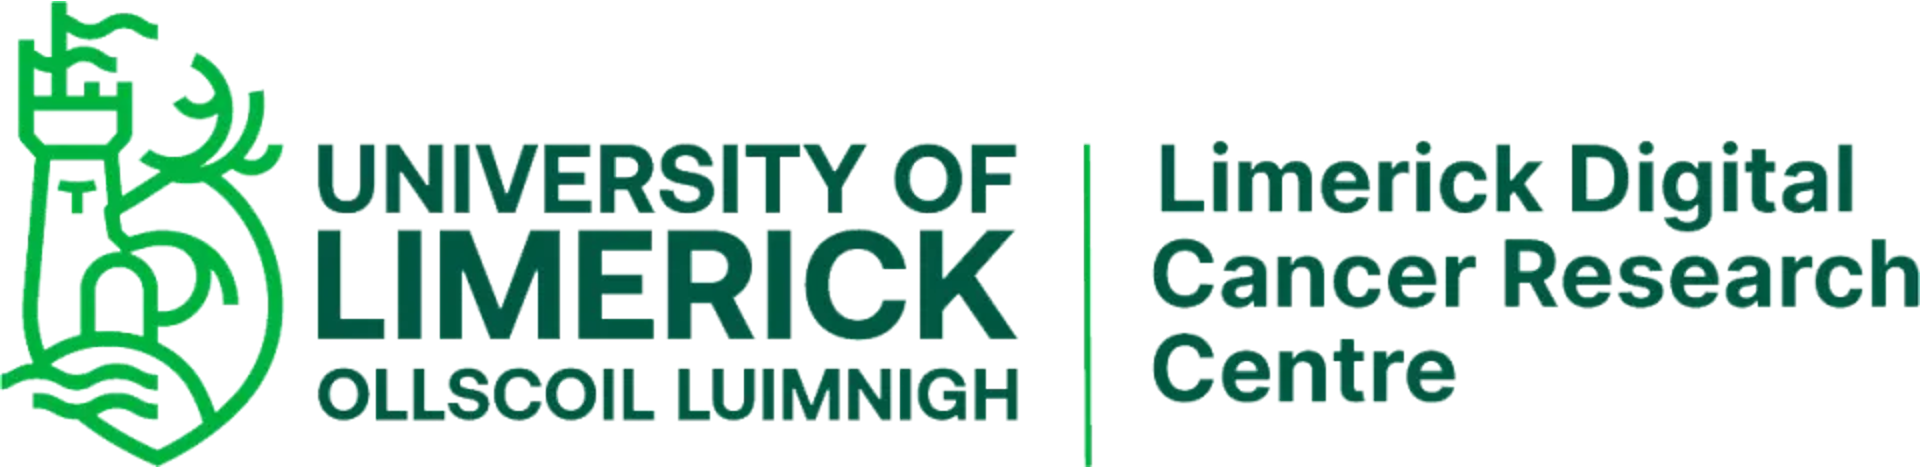


# Patient Profile Creation and Matching

## Objective
This project will use the following two notebooks:
1. **Patient_Profile_Creation**: Generates a randomized patient profile based on a selected clinical trial (NCT ID).
2. **Patient_Profile_Treatment_Recommendation**: Evaluates the generated profile to determine eligibility for a treatment given the patient profile.

---

## Instructions

### 1. Get a Clinical Trial NCT ID
- Visit: [https://clinicaltrials.gov](https://clinicaltrials.gov)
- Set the **condition/disease filter** to:  Head and Neck Squamous Cell Carcinoma



- Click **Search**
- On the results page:
- Use the **filters on the left**
- Select the **Completed** status
- Choose any clinical trial from the list and **copy its NCT ID**

---

### 2. Generate a Patient Profile
- Open the `Patient_Profile_Creation.ipynb` notebook
- Run all cells
- When prompted, **paste the copied NCT ID**
- A randomized patient profile will be generated based on the selected trial

---

### 3. Get Treatment Recommendation
- Open the `Patient_Profile_Treatment_Recommendation.ipynb` notebook
- Locate the `main()` function
- **Paste the generated patient profile** as the input
- Run the notebook to get the **treatment recommendation.**

---
- For demonstration, use the sample trial:  
[NCT02268695](https://clinicaltrials.gov/study/NCT02268695)

---




In [ ]:
import requests
import re
import random

def fetch_clinical_trial_data_v2(nct_id):
    """
    Fetch clinical trial data from ClinicalTrials.gov API v2 using the NCT ID.
    """
    base_url = "https://clinicaltrials.gov/api/v2/studies/"
    url = f"{base_url}{nct_id}"
    headers = {"accept": "application/json"}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        try:
            return response.json()
        except requests.exceptions.JSONDecodeError:
            print("Error decoding JSON from the API response.")
            return None
    else:
        print(f"Error: Received status code {response.status_code} from ClinicalTrials.gov API v2.")
        return None

def parse_clinical_trial_response(data):
    """
    Parse the clinical trial response and extract relevant details.
    """
    try:
        protocol_section = data.get("protocolSection", {})
        identification = protocol_section.get("identificationModule", {})
        eligibility = protocol_section.get("eligibilityModule", {})
        description = protocol_section.get("descriptionModule", {})
        conditions = protocol_section.get("conditionsModule", {})

        trial_info = {
            "NCT ID": identification.get("nctId", "N/A"),
            "Title": identification.get("officialTitle", "N/A"),
            "Brief Summary": description.get("briefSummary", "N/A"),
            "Eligibility Criteria": eligibility.get("eligibilityCriteria", "N/A"),
            "Conditions": conditions.get("conditions", []),
        }

        # Parse age range from eligibility criteria
        age_range = re.search(r"Age\s*([^\n]*)", trial_info["Eligibility Criteria"])
        if age_range:
            trial_info["Age Range"] = age_range.group(1).strip()
        else:
            trial_info["Age Range"] = "18-70"  # Default age range

        return trial_info
    except Exception as e:
        print(f"Error parsing trial response: {e}")
        return None

def generate_random_patient_profile_from_trial(trial_info):
    """
    Generate a randomized patient profile based on the clinical trial details.
    """
    if not trial_info:
        return "No valid trial information available to generate a patient profile."

    # Parse age range
    age_range = trial_info.get("Age Range", "18-70")
    age_min, age_max = map(int, re.findall(r"\d+", age_range))
    age = random.randint(age_min, age_max)

    # Randomize other attributes
    gender = random.choice(["Male", "Female"])
    ecog_status = random.choice([0, 1])  # Assume ECOG <2 based on typical trial criteria
    treatment_history = random.choice([
    "no prior PD-1, PD-L1 or EGFR inhibition",
    "previous systemic therapy for a different indication",

    # 1
    "Oral Cavity Tumor (Stage III): Partial glossectomy + neck dissection; Adjuvant radiation (60 Gy) completed 14 months ago; No prior systemic therapy; No Cetuximab or immunotherapy",

    # 2
    "Laryngeal Cancer (Stage II): Total laryngectomy; Adjuvant radiation (66 Gy) finished 18 months ago; No chemotherapy; No Cetuximab or immunotherapy",

    # 3
    "Oropharyngeal Carcinoma (HPV-): Wide local excision + bilateral neck dissection; Adjuvant radiation (70 Gy) + weekly cisplatin, ended 16 months ago; No EGFR inhibitors or immunotherapy",

    # 4
    "Hypopharyngeal Cancer (Stage IVa): Pharyngectomy; Adjuvant radiation (60 Gy) completed 20 months ago; No concurrent chemo; No Cetuximab or immunotherapy",

    # 5
    "Oral Cavity (Buccal Mucosa): Surgical resection + ipsilateral neck dissection; Adjuvant radiation (66 Gy) finished 13 months ago; No targeted therapies; No immunotherapy",

    # 6
    "Tonsillar Carcinoma (HPV-): Robotic surgery + contralateral neck dissection; Adjuvant radiation (66 Gy) + cisplatin (2 cycles) ended 15 months ago; No prior Cetuximab or checkpoint inhibitors",

    # 7
    "Floor of Mouth Cancer (Stage III): Composite resection + neck dissection; Adjuvant radiation (60 Gy) alone ended 19 months ago; No EGFR-targeted or immunotherapy",

    # 8
    "Oropharyngeal Cancer (T2N1): Surgery + selective neck dissection; Adjuvant radiation (63 Gy) + low-dose carboplatin completed 17 months ago; No Cetuximab or immunotherapy",

    # 9
    "Nasopharyngeal Cancer (Surgically Managed): Endoscopic nasopharyngectomy; Adjuvant radiation (70 Gy) completed 24 months ago; No anti-EGFR or immunotherapy",

    # 10
    "Oral Tongue Tumor (Stage II): Partial glossectomy; Adjuvant radiation (54 Gy) ended 14 months ago; No chemotherapy; Never received Cetuximab or IO therapy",

    # 11
    "Laryngeal Carcinoma (T3N0): Vertical partial laryngectomy; Adjuvant radiation (60 Gy) + weekly cisplatin, finished 13 months ago; No immunotherapy; No anti-EGFR therapy",

    # 12
    "Oropharyngeal Cancer (HPV+, Low Risk): TORS + minimal neck dissection; Adjuvant radiation (50 Gy) completed 15 months ago; No chemo; No Cetuximab or immunotherapy",

    # 13
    "Maxillary Sinus SCC: Maxillectomy + orbital floor reconstruction; Adjuvant radiation (64 Gy) ended 22 months ago; No prior targeted therapy; No immunotherapy",

    # 14
    "Recurrent Oral Tongue Cancer (Salvage Surgery): Initial partial glossectomy + adjuvant radiation 2 years ago; Minor salvage resection 14 months ago; No Cetuximab or immunotherapy",

    # 15
    "Hypopharyngeal (Pyriform Sinus) Lesion: Partial pharyngectomy; Adjuvant radiation (66 Gy) ended 16 months ago; No prior systemic therapy beyond supportive care; No EGFR or IO",

    # 16
    "Oropharyngeal Primary with Single-Node Involvement: Surgery + prophylactic ipsilateral neck dissection; Adjuvant radiation (60 Gy) completed 14 months ago; No chemo; No immunotherapy",

    # 17
    "Oral Cavity Carcinoma (Mandibular Invasion): Marginal mandibulectomy + neck dissection; Adjuvant radiation (70 Gy) + weekly carboplatin ended 18 months ago; No Cetuximab or IO",

    # 18
    "Tonsillar Fossa SCC (HPV-): Tonsillectomy + ipsilateral neck dissection; Adjuvant radiation (66 Gy) completed 13 months ago; No concurrent chemo; no immunotherapy",

    # 19
    "Laryngeal Cancer with Early Recurrence: Initial total laryngectomy + adjuvant radiation 2 years ago; Minor salvage neck dissection 14 months ago; no Cetuximab or IO therapy",

    # 20
    "Lip Squamous Cell Carcinoma (Rare Site): Wide excision + sentinel node biopsy; Adjuvant radiation (50 Gy) finished 12 months ago; No targeted therapies; no immunotherapy",

    # 21
    "Oropharyngeal (Base of Tongue) Cancer: Transoral laser microsurgery; Adjuvant radiation (60 Gy) + low-dose cisplatin ended 15 months ago; No Cetuximab or IO therapy",

    # 22
    "Extensive Oral Cavity Carcinoma: Composite resection with free flap reconstruction; Adjuvant radiation (66 Gy) ended 19 months ago; No adjuvant Cetuximab; No IO therapy",

    # 23
    "Oropharyngeal Carcinoma (HPV+, Intermediate Risk): TORS + bilateral neck dissection; Adjuvant radiation (56 Gy) ended 13 months ago; No chemo; no immunotherapy",

    # 24
    "Oropharynx Cancer (Crossing Midline): Surgery + bilateral neck dissections; Adjuvant radiation (66 Gy) + 2 cycles of cisplatin finished 15 months ago; No EGFR or IO therapy",

    # 25
    "Carcinoma of the Soft Palate: Surgical excision + neck dissection; Adjuvant radiation (60 Gy) completed 14 months ago; No Cetuximab; No immunotherapy",

    # 26
    "Recurrent Oral Tongue Cancer (Second Primary): First primary resected + adjuvant radiation 3 years ago; Second primary resected 2 years ago; No EGFR inhibitors or IO",

    # 27
    "Extensive Tonsillar SCC (HPV-): Surgery (partial pharyngectomy + neck dissection); Adjuvant radiation (64 Gy) ended 20 months ago; No chemo; No immunotherapy",

    # 28
    "Lateral Border of Tongue Lesion: Hemiglossectomy + level I-III neck dissection; Adjuvant radiation (60 Gy) ended 18 months ago; No targeted therapy; No immunotherapy",

    # 29
    "Oropharyngeal SCC (Base of Tongue, T2N2): TORS + bilateral neck dissection; Adjuvant chemo-radiation with weekly carboplatin finished 14 months ago; No Cetuximab or IO",

    # 30
    "Posterior Pharyngeal Wall Tumor: Radical pharyngectomy + reconstruction; Adjuvant radiation (66 Gy) completed 16 months ago; No chemo; No anti-EGFR or IO therapy",
])
    # Randomize medical conditions from trial
    diagnosis = random.choice(trial_info['Conditions']) if trial_info['Conditions'] else "Head and Neck Squamous Cell Carcinoma"

    # Structured profile
    profile = {
        "Age": age,
        "Gender": gender,
        "Diagnosis": diagnosis,
        "ECOGPerformanceStatus": ecog_status,
        "TreatmentHistory": treatment_history
    }
    return profile

def display_trial_info_and_profile(trial_info, patient_profile):
    """
    Display the parsed clinical trial information and the generated patient profile.
    """
    if not trial_info:
        print("No valid trial information found.")
        return

    print("Generated Patient Profile:\n")
    for key, value in patient_profile.items():
        print(f"{key}: {value}")

if __name__ == "__main__":
    nct_id = input("Enter the NCT Clinical Trial ID: ").strip()

    trial_data = fetch_clinical_trial_data_v2(nct_id)

    if trial_data:
        trial_info = parse_clinical_trial_response(trial_data)
        patient_profile = generate_random_patient_profile_from_trial(trial_info)
        display_trial_info_and_profile(trial_info, patient_profile)
    else:
        print(f"No data found for NCT ID {nct_id}. Please verify the ID or try again later.")


Enter the NCT Clinical Trial ID: NCT03667482
Generated Patient Profile:

Age: 59
Gender: Male
Diagnosis: Recurrent Head and Neck Squamous Cell Cancer
ECOGPerformanceStatus: 0
TreatmentHistory: Oropharyngeal Carcinoma (HPV+, Intermediate Risk): TORS + bilateral neck dissection; Adjuvant radiation (56 Gy) ended 13 months ago; No chemo; no immunotherapy
